In [1]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from genslm_esm.dataset import read_fasta

In [33]:
aminoacid_embeddings = np.load("./ec_embeddings_v1/ec_v1_test_8m_contrastive_aminoacid_embeddings.npy")
codon_embeddings = np.load("./ec_embeddings_v1/ec_v1_test_8m_contrastive_codon_embeddings.npy")
esm_8m_embeddings = np.load("./ec_embeddings_v1/ec_v1_test_8m_esm2_aminoacid_embeddings.npy")
labels = np.load("./ec_data_v1/ec_v1_test_labels.npy")
labels = np.array([".".join(label.split('.')[:2]) for label in labels]) # Only consider the first two EC levels (e.g., 1.1)

In [20]:
# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
embedded_data = tsne.fit_transform(aminoacid_embeddings)

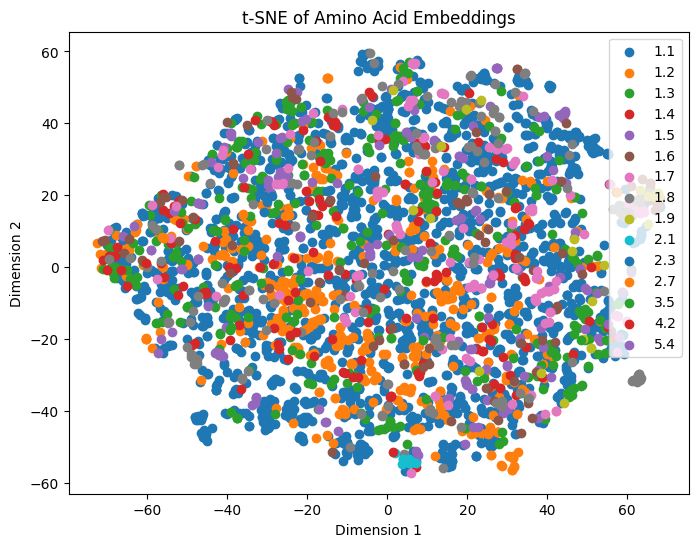

In [21]:
# Plot the t-SNE visualization with color-coded categorical labels
plt.figure(figsize=(8, 6))
for category in np.unique(labels):
    category_indices = (labels == category)
    plt.scatter(embedded_data[category_indices, 0], embedded_data[category_indices, 1], label=category)

plt.title('t-SNE of Amino Acid Embeddings')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

In [22]:
# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
embedded_data = tsne.fit_transform(codon_embeddings)

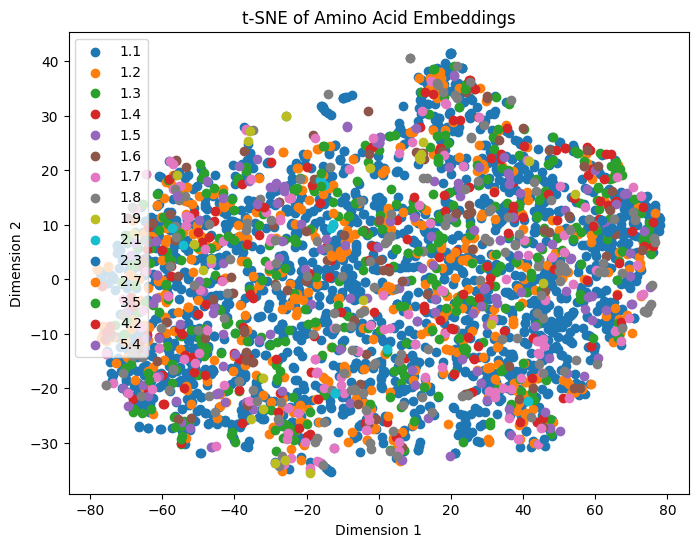

In [23]:
# Plot the t-SNE visualization with color-coded categorical labels
plt.figure(figsize=(8, 6))
for category in np.unique(labels):
    category_indices = (labels == category)
    plt.scatter(embedded_data[category_indices, 0], embedded_data[category_indices, 1], label=category)

plt.title('t-SNE of Amino Acid Embeddings')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(aminoacid_embeddings, labels, test_size=0.2, random_state=42)

# Fit a logistic regression classifier
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5184135977337111


/homes/abrace/.conda/envs/esm/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(codon_embeddings, labels, test_size=0.2, random_state=42)

# Fit a logistic regression classifier
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5226628895184136


/homes/abrace/.conda/envs/esm/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
embedded_data = tsne.fit_transform(esm_8m_embeddings)

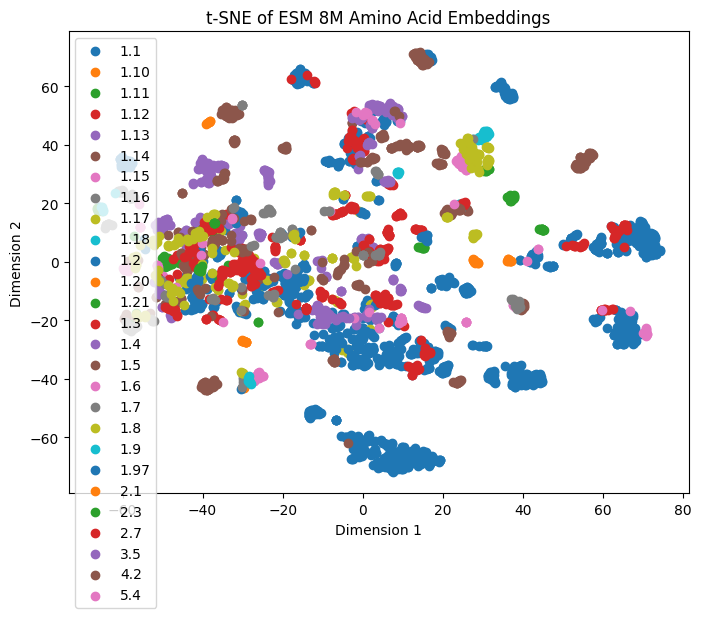

In [35]:
# Plot the t-SNE visualization with color-coded categorical labels
plt.figure(figsize=(8, 6))
for category in np.unique(labels):
    category_indices = (labels == category)
    plt.scatter(embedded_data[category_indices, 0], embedded_data[category_indices, 1], label=category)

plt.title('t-SNE of ESM 8M Amino Acid Embeddings')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(esm_8m_embeddings, labels, test_size=0.2, random_state=42)

# Fit a logistic regression classifier
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7337110481586402


/homes/abrace/.conda/envs/esm/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
from collections import defaultdict
perf = defaultdict(int)
total = defaultdict(int)
for true, pred in zip(y_test, y_pred):
    perf[true] += int(true == pred)
    total[true] += 1

label_counts = Counter(y_test)
acc = sum(perf.values()) / len(y_test)
print("Overall Accuracy:", acc)
for label in total:
    print(f"{label} Examples: {label_counts[label]} Accuracy: {round(perf[label] / total[label], 3)}")

Overall Accuracy: 0.7337110481586402
1.4 Examples: 42 Accuracy: 0.524
1.3 Examples: 94 Accuracy: 0.596
1.14 Examples: 73 Accuracy: 0.932
1.1 Examples: 193 Accuracy: 0.933
1.12 Examples: 7 Accuracy: 0.857
1.2 Examples: 81 Accuracy: 0.716
1.13 Examples: 34 Accuracy: 0.824
1.17 Examples: 20 Accuracy: 0.3
1.8 Examples: 26 Accuracy: 0.654
1.5 Examples: 29 Accuracy: 0.414
1.21 Examples: 1 Accuracy: 1.0
1.6 Examples: 17 Accuracy: 0.471
1.7 Examples: 25 Accuracy: 0.64
1.16 Examples: 6 Accuracy: 0.667
2.1 Examples: 2 Accuracy: 0.0
4.2 Examples: 2 Accuracy: 0.0
3.5 Examples: 4 Accuracy: 0.5
2.3 Examples: 4 Accuracy: 0.0
2.7 Examples: 2 Accuracy: 0.0
1.11 Examples: 19 Accuracy: 0.789
1.15 Examples: 4 Accuracy: 1.0
1.20 Examples: 4 Accuracy: 1.0
1.18 Examples: 7 Accuracy: 0.571
5.4 Examples: 3 Accuracy: 0.667
1.97 Examples: 3 Accuracy: 1.0
1.10 Examples: 2 Accuracy: 1.0
1.9 Examples: 2 Accuracy: 0.0


# v2 contrastive model with separate lm heads for amino acid and codons and AA weight init

In [4]:
aminoacid_embeddings = np.load("./ec_embeddings_v1/ec_v1_contrastive_8m_v2_aminoacid_embeddings.npy")
codon_embeddings = np.load("./ec_embeddings_v1/ec_v1_contrastive_8m_v2_codon_embeddings.npy")

labels = np.load("./ec_data_v1/ec_v1_test_labels.npy")
labels = np.array([".".join(label.split('.')[:2]) for label in labels]) # Only consider the first two EC levels (e.g., 1.1)

In [10]:
np.unique(labels), len(np.unique(labels))

(array(['1.1', '1.10', '1.11', '1.12', '1.13', '1.14', '1.15', '1.16',
        '1.17', '1.18', '1.2', '1.20', '1.21', '1.3', '1.4', '1.5', '1.6',
        '1.7', '1.8', '1.9', '1.97', '2.1', '2.3', '2.7', '3.5', '4.2',
        '5.4'], dtype='<U4'),
 27)

In [6]:
# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
embedded_data = tsne.fit_transform(aminoacid_embeddings)

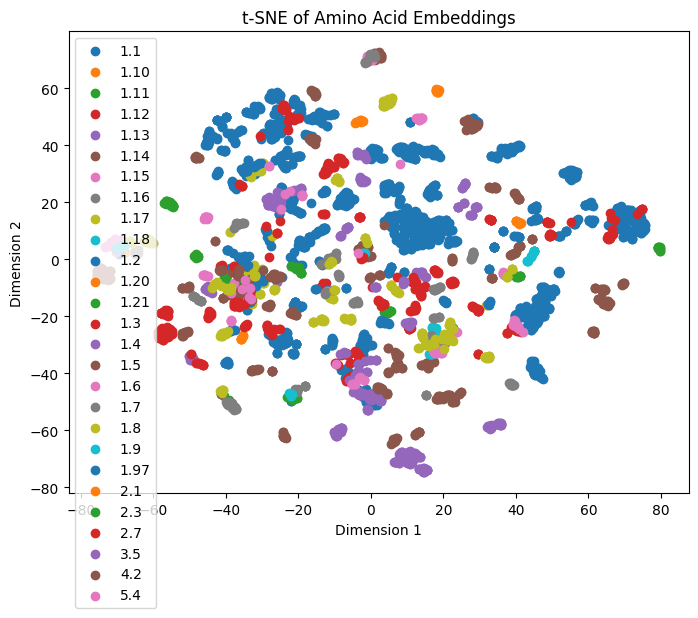

In [7]:
# Plot the t-SNE visualization with color-coded categorical labels
plt.figure(figsize=(8, 6))
for category in np.unique(labels):
    category_indices = (labels == category)
    plt.scatter(embedded_data[category_indices, 0], embedded_data[category_indices, 1], label=category)

plt.title('t-SNE of Amino Acid Embeddings')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(aminoacid_embeddings, labels, test_size=0.2, random_state=42)

# Fit a logistic regression classifier
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.886685552407932


/homes/abrace/.conda/envs/esm/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
from collections import defaultdict
perf = defaultdict(int)
total = defaultdict(int)
for true, pred in zip(y_test, y_pred):
    perf[true] += int(true == pred)
    total[true] += 1

label_counts = Counter(y_test)
acc = sum(perf.values()) / len(y_test)
print("Overall Accuracy:", acc)
for label in total:
    print(f"{label} Examples: {label_counts[label]} Accuracy: {round(perf[label] / total[label], 3)}")

Overall Accuracy: 0.886685552407932
1.4 Examples: 42 Accuracy: 0.833
1.3 Examples: 94 Accuracy: 0.777
1.14 Examples: 73 Accuracy: 0.986
1.1 Examples: 193 Accuracy: 0.979
1.12 Examples: 7 Accuracy: 0.857
1.2 Examples: 81 Accuracy: 0.914
1.13 Examples: 34 Accuracy: 1.0
1.17 Examples: 20 Accuracy: 0.65
1.8 Examples: 26 Accuracy: 0.692
1.5 Examples: 29 Accuracy: 0.793
1.21 Examples: 1 Accuracy: 1.0
1.6 Examples: 17 Accuracy: 0.706
1.7 Examples: 25 Accuracy: 1.0
1.16 Examples: 6 Accuracy: 0.667
2.1 Examples: 2 Accuracy: 1.0
4.2 Examples: 2 Accuracy: 0.5
3.5 Examples: 4 Accuracy: 1.0
2.3 Examples: 4 Accuracy: 0.5
2.7 Examples: 2 Accuracy: 0.5
1.11 Examples: 19 Accuracy: 0.895
1.15 Examples: 4 Accuracy: 1.0
1.20 Examples: 4 Accuracy: 1.0
1.18 Examples: 7 Accuracy: 0.714
5.4 Examples: 3 Accuracy: 0.667
1.97 Examples: 3 Accuracy: 0.667
1.10 Examples: 2 Accuracy: 1.0
1.9 Examples: 2 Accuracy: 0.5


In [11]:
# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
embedded_data = tsne.fit_transform(codon_embeddings)

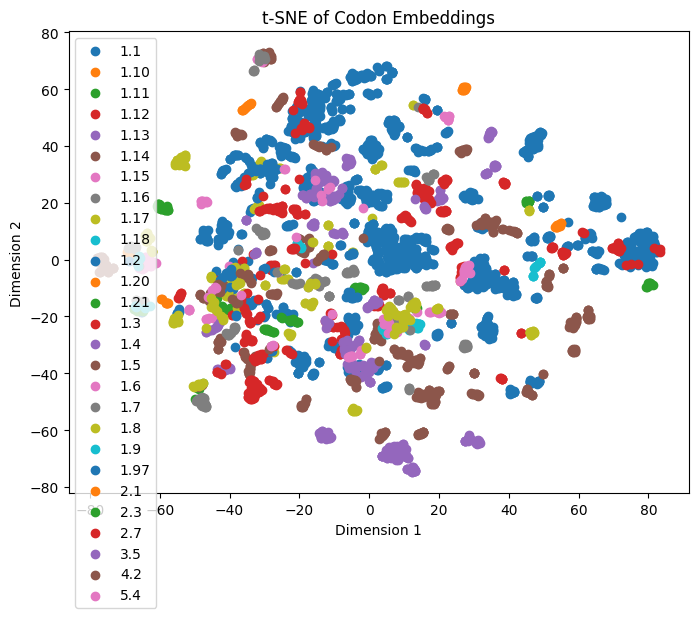

In [12]:
# Plot the t-SNE visualization with color-coded categorical labels
plt.figure(figsize=(8, 6))
for category in np.unique(labels):
    category_indices = (labels == category)
    plt.scatter(embedded_data[category_indices, 0], embedded_data[category_indices, 1], label=category)

plt.title('t-SNE of Codon Embeddings')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(codon_embeddings, labels, test_size=0.2, random_state=42)

# Fit a logistic regression classifier
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8739376770538244


/homes/abrace/.conda/envs/esm/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
classifier.coef_.shape

(27, 320)

# nn.Embedding injection

In [1]:
%load_ext autoreload
%autoreload 2
    
import torch
from copy import deepcopy
from transformers import EsmTokenizer
from genslm_esm.modeling_esm_v2 import EsmForContrastiveMaskedLM
from genslm_esm.dataset import translation_table

[2024-01-20 12:16:42,129] [INFO] [real_accelerator.py:161:get_accelerator] Setting ds_accelerator to cuda (auto detect)


In [7]:
@torch.no_grad()
def update_model_weights(model, tokenizer):
    # Get the original token embedding matrix (TEM)
    original_tem = deepcopy(model.esm.embeddings.word_embeddings.weight)
    # Get the original amino acid lm head
    original_lm_head = deepcopy(model.lm_head)

    # Update model tem
    model.resize_model_vocab(len(tokenizer))

    # Get a reference to the new TEM matrix
    new_tem = model.esm.embeddings.word_embeddings.weight

    # Set each of the new codon representations equal to their corresponding
    # amino acid representations (note that amino acid representations are 
    # unchanged by vocabulary expansion)
    # Here we are looping over the entire vocab, but we are only using the
    # vocab elements which are codons, so we name the variables accordingly.
    for codon, codon_id in tokenizer.get_vocab().items():
        # Note: the translation table maps stop codons to "" and the get
        # function maps the special tokens and amino acids to "" as well.
        aminoacid = translation_table.get(codon, "")
        if aminoacid:
            aminoacid_id = tokenizer._token_to_id[aminoacid]
            # The new TEM matrix aminoacid represenations are the same
            # as the original TEM (they are preserved during resizing)
            new_tem[codon_id] = deepcopy(new_tem[aminoacid_id])
            assert torch.equal(original_tem[aminoacid_id], new_tem[codon_id])

    # Check that the TEM matrix was updated correctly
    assert torch.equal(original_tem, new_tem[:len(original_tem)])
    assert torch.equal(model.esm.embeddings.word_embeddings.weight, new_tem)

    # Now that the TEM is updated, we also need to update the lm heads
    # for amino acids and codons.
    
    # Resizing vocab changes the original aminoacid lm_head, we want to
    # change it back since we have a separate lm_head for the codon vocabulary.
    model.lm_head = deepcopy(original_lm_head)
    # Check that the original amino acid lm_head was reloaded correctly
    assert torch.equal(original_lm_head.dense.weight, model.lm_head.dense.weight)
    assert torch.equal(original_lm_head.dense.bias, model.lm_head.dense.bias)
    assert torch.equal(original_lm_head.layer_norm.weight, model.lm_head.layer_norm.weight)
    assert torch.equal(original_lm_head.layer_norm.bias, model.lm_head.layer_norm.bias)
    assert torch.equal(original_lm_head.decoder.weight, model.lm_head.decoder.weight)
    assert torch.equal(original_lm_head.bias, model.lm_head.bias)

    # We initialize the codon_lm_head dense and layer_norm layers
    # with the vocab-size invariant amino acid counterparts
    model.codon_lm_head.dense = deepcopy(model.lm_head.dense)
    model.codon_lm_head.layer_norm = deepcopy(model.lm_head.layer_norm)
    # Check that the weights have been updated properly
    assert torch.equal(model.codon_lm_head.dense.weight, model.lm_head.dense.weight)
    assert torch.equal(model.codon_lm_head.dense.bias, model.lm_head.dense.bias)
    assert torch.equal(model.codon_lm_head.layer_norm.weight, model.lm_head.layer_norm.weight)
    assert torch.equal(model.codon_lm_head.layer_norm.bias, model.lm_head.layer_norm.bias)
    assert id(model.codon_lm_head.dense) != id(model.lm_head.dense)
    assert id(model.codon_lm_head.layer_norm) != id(model.lm_head.layer_norm)
    
    # Get the original aminoacid lm_head decoder weights
    aminoacid_decoder = original_lm_head.decoder.weight
    aminoacid_bias = original_lm_head.bias
    
    # Get references to the codon_lm_head components to change
    codon_decoder = model.codon_lm_head.decoder.weight
    codon_bias = model.codon_lm_head.bias

    # Since the vocabulary is combined, there is a total vocab size of 97 
    # (amino acid + codons + special). However, the codon_lm_head decoder 
    # and bias only has an output size of 69 (codon + special). Our goals
    # are to (1) initialize the weights relevant to special tokens to be
    # identical to the original amino acid lm_head weights, and (2) to
    # initialize the weights for each codon to the weights of the translated 
    # amino acid in the original lm head. Here the enumeration is taken over
    # the 69 codon/special tokens. The first 5 tokens are the special tokens
    # which are set to the first 5 dimensions of the codon_decoder/bias.
    for codon_idx, codon in enumerate(tokenizer.added_tokens_decoder.values()):
        aminoacid = translation_table.get(str(codon), "")
        # The codon could be a special token (<cls>, <pad>, <eos>, <unk>, <mask>)
        if aminoacid or codon.special:
            # Get the id of the aminoacid/special token corresponding to the current codon
            aminoacid_id = tokenizer._token_to_id[str(codon) if codon.special else aminoacid]
            # Update the codon_decoder/bias with the corresponding aminoacid weights
            codon_decoder[codon_idx] = deepcopy(aminoacid_decoder[aminoacid_id])
            codon_bias[codon_idx] = deepcopy(aminoacid_bias[aminoacid_id])
            # Check that the update was successfull
            assert torch.equal(codon_decoder[codon_idx], aminoacid_decoder[aminoacid_id])
            assert torch.equal(codon_bias[codon_idx], aminoacid_bias[aminoacid_id])
            assert torch.equal(codon_decoder, model.codon_lm_head.decoder.weight)
            assert torch.equal(codon_bias, model.codon_lm_head.bias)  


In [24]:
model = EsmForContrastiveMaskedLM.from_pretrained("facebook/esm2_t6_8M_UR50D")

Some weights of EsmForContrastiveMaskedLM were not initialized from the model checkpoint at facebook/esm2_t6_8M_UR50D and are newly initialized: ['contrastive_head.aminoacid_projection.0.bias', 'contrastive_head.aminoacid_projection.0.weight', 'contrastive_head.aminoacid_projection.2.bias', 'contrastive_head.aminoacid_projection.2.weight', 'contrastive_head.codon_projection.0.bias', 'contrastive_head.codon_projection.0.weight', 'contrastive_head.codon_projection.2.bias', 'contrastive_head.codon_projection.2.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [25]:
model

EsmForContrastiveMaskedLM(
  (esm): EsmModel(
    (embeddings): EsmEmbeddings(
      (word_embeddings): Embedding(33, 320, padding_idx=1)
      (dropout): Dropout(p=0.0, inplace=False)
      (position_embeddings): Embedding(1026, 320, padding_idx=1)
    )
    (encoder): EsmEncoder(
      (layer): ModuleList(
        (0-5): 6 x EsmLayer(
          (attention): EsmAttention(
            (self): EsmSelfAttention(
              (query): Linear(in_features=320, out_features=320, bias=True)
              (key): Linear(in_features=320, out_features=320, bias=True)
              (value): Linear(in_features=320, out_features=320, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
              (rotary_embeddings): RotaryEmbedding()
            )
            (output): EsmSelfOutput(
              (dense): Linear(in_features=320, out_features=320, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (LayerNorm): LayerNorm((320,), eps=1e-05, el

In [26]:
original_tem = deepcopy(model.esm.embeddings.word_embeddings.weight)
original_tem

Parameter containing:
tensor([[-0.1954, -0.2751, -0.1494,  ...,  0.1274, -0.1043, -0.0647],
        [-0.2225, -0.9604, -0.0598,  ..., -0.2300, -0.0948,  0.3914],
        [ 0.0731, -0.3081, -0.1170,  ..., -0.2206, -0.3433, -0.0015],
        ...,
        [ 0.0453, -0.0554, -0.0102,  ...,  0.0438, -0.0365, -0.1022],
        [ 0.0534, -0.0443, -0.0183,  ...,  0.0427, -0.0536, -0.0892],
        [-0.2281, -0.9619, -0.0608,  ..., -0.2356, -0.0932,  0.3992]],
       requires_grad=True)

In [27]:
new_tokenizer = EsmTokenizer.from_pretrained("../../tokenizer_esm_genslm") # amino acid + codon

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [28]:
len(new_tokenizer)

97

In [29]:
# Update model tem
model.resize_model_vocab(len(new_tokenizer))

Resizing token embedding layer from 33 to 97. This reinitializes the EsmLMHead and input embedding layer weights


In [10]:
new_tem = model.esm.embeddings.word_embeddings.weight
new_tem

Parameter containing:
tensor([[-1.9543e-01, -2.7515e-01, -1.4941e-01,  ...,  1.2744e-01,
         -1.0431e-01, -6.4697e-02],
        [-2.2253e-01, -9.6045e-01, -5.9753e-02,  ..., -2.2998e-01,
         -9.4849e-02,  3.9136e-01],
        [ 7.3120e-02, -3.0811e-01, -1.1700e-01,  ..., -2.2058e-01,
         -3.4326e-01, -1.5488e-03],
        ...,
        [ 1.4235e-02,  1.2134e-02,  4.3109e-03,  ..., -2.0315e-02,
         -5.4809e-02, -4.3391e-04],
        [-3.4604e-02,  9.5472e-03, -1.8886e-03,  ...,  2.9640e-02,
         -1.0370e-02,  1.5976e-02],
        [ 6.0633e-03, -1.6421e-02, -3.8246e-02,  ...,  8.4685e-03,
          7.9921e-03,  2.7653e-02]], requires_grad=True)

In [11]:
original_tem.shape, new_tem.shape

(torch.Size([33, 320]), torch.Size([97, 320]))

In [12]:
with torch.no_grad():
    for codon, codon_id in new_tokenizer.get_vocab().items():
        aminoacid = translation_table.get(codon, "")
        if aminoacid:
            aminoacid_id = new_tokenizer._token_to_id[aminoacid]
            new_tem[codon_id] = deepcopy(new_tem[aminoacid_id])
            assert torch.equal(original_tem[aminoacid_id], new_tem[codon_id])

assert torch.equal(original_tem, new_tem[:len(original_tem)])
assert torch.equal(model.esm.embeddings.word_embeddings.weight, new_tem)

In [13]:
# After change

In [14]:
new_tem

Parameter containing:
tensor([[-0.1954, -0.2751, -0.1494,  ...,  0.1274, -0.1043, -0.0647],
        [-0.2225, -0.9604, -0.0598,  ..., -0.2300, -0.0948,  0.3914],
        [ 0.0731, -0.3081, -0.1170,  ..., -0.2206, -0.3433, -0.0015],
        ...,
        [-0.0989, -0.0354, -0.0403,  ...,  0.0233,  0.0246,  0.1105],
        [-0.0346,  0.0095, -0.0019,  ...,  0.0296, -0.0104,  0.0160],
        [ 0.0061, -0.0164, -0.0382,  ...,  0.0085,  0.0080,  0.0277]],
       requires_grad=True)

In [9]:
model = EsmForContrastiveMaskedLM.from_pretrained("facebook/esm2_t6_8M_UR50D")
new_tokenizer = EsmTokenizer.from_pretrained("../../tokenizer_esm_genslm") # amino acid + codon

Some weights of EsmForContrastiveMaskedLM were not initialized from the model checkpoint at facebook/esm2_t6_8M_UR50D and are newly initialized: ['codon_lm_head.bias', 'codon_lm_head.decoder.weight', 'codon_lm_head.dense.bias', 'codon_lm_head.dense.weight', 'codon_lm_head.layer_norm.bias', 'codon_lm_head.layer_norm.weight', 'contrastive_head.aminoacid_projection.0.bias', 'contrastive_head.aminoacid_projection.0.weight', 'contrastive_head.aminoacid_projection.2.bias', 'contrastive_head.aminoacid_projection.2.weight', 'contrastive_head.codon_projection.0.bias', 'contrastive_head.codon_projection.0.weight', 'contrastive_head.codon_projection.2.bias', 'contrastive_head.codon_projection.2.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [10]:
original_lm_head = deepcopy(model.lm_head)
original_lm_head.dense.weight

Parameter containing:
tensor([[ 0.0505,  0.0168,  0.0416,  ..., -0.0920,  0.1813, -0.0088],
        [-0.2886, -0.0825,  0.1447,  ...,  0.2620,  0.1396,  0.0122],
        [-0.1838,  0.0318,  0.1110,  ...,  0.0699,  0.0450, -0.0169],
        ...,
        [-0.0840,  0.0179, -0.0638,  ...,  0.0639, -0.0801,  0.0605],
        [ 0.2542, -0.0521, -0.0380,  ..., -0.0714,  0.1788, -0.1035],
        [ 0.0427, -0.0635, -0.0739,  ..., -0.0365, -0.0420,  0.1085]],
       requires_grad=True)

In [11]:
# Update model tem
model.resize_model_vocab(len(new_tokenizer))

Resizing token embedding layer from 33 to 97. This reinitializes the EsmLMHead and input embedding layer weights


In [12]:
model.lm_head.decoder.weight.shape

torch.Size([97, 320])

In [13]:
original_lm_head.decoder.weight.shape

torch.Size([33, 320])

In [14]:
# Resizing vocab changes the original aminoacid lm_head, we want to
# change it back since we have a new lm_head for the codon vocabulary.
model.lm_head = deepcopy(original_lm_head)

# Check that the original amino acid lm_head was reloaded correctly
assert torch.equal(original_lm_head.dense.weight, model.lm_head.dense.weight)
assert torch.equal(original_lm_head.dense.bias, model.lm_head.dense.bias)
assert torch.equal(original_lm_head.layer_norm.weight, model.lm_head.layer_norm.weight)
assert torch.equal(original_lm_head.layer_norm.bias, model.lm_head.layer_norm.bias)
assert torch.equal(original_lm_head.decoder.weight, model.lm_head.decoder.weight)
assert torch.equal(original_lm_head.bias, model.lm_head.bias)

In [15]:
model.lm_head

EsmLMHead(
  (dense): Linear(in_features=320, out_features=320, bias=True)
  (layer_norm): LayerNorm((320,), eps=1e-05, elementwise_affine=True)
  (decoder): Linear(in_features=320, out_features=33, bias=False)
)

In [16]:
model.codon_lm_head

EsmLMHead(
  (dense): Linear(in_features=320, out_features=320, bias=True)
  (layer_norm): LayerNorm((320,), eps=1e-05, elementwise_affine=True)
  (decoder): Linear(in_features=320, out_features=69, bias=False)
)

In [18]:
# We initialize the codon_lm_head dense and layer_norm layers
# with the vocab-size invariant amino acid counterparts
model.codon_lm_head.dense = deepcopy(model.lm_head.dense)
model.codon_lm_head.layer_norm = deepcopy(model.lm_head.layer_norm)

# Check that the weights have been updated properly
assert torch.equal(model.codon_lm_head.dense.weight, model.lm_head.dense.weight)
assert torch.equal(model.codon_lm_head.dense.bias, model.lm_head.dense.bias)
assert torch.equal(model.codon_lm_head.layer_norm.weight, model.lm_head.layer_norm.weight)
assert torch.equal(model.codon_lm_head.layer_norm.bias, model.lm_head.layer_norm.bias)
assert id(model.codon_lm_head.dense) != id(model.lm_head.dense)
assert id(model.codon_lm_head.layer_norm) != id(model.lm_head.layer_norm)

In [19]:
len(new_tokenizer)

97

In [20]:
len(new_tokenizer.added_tokens_decoder)

69

In [21]:
new_tokenizer.added_tokens_decoder

{0: AddedToken("<cls>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
 1: AddedToken("<pad>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
 2: AddedToken("<eos>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
 3: AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
 32: AddedToken("<mask>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
 33: AddedToken("GGC", rstrip=False, lstrip=False, single_word=False, normalized=True, special=False),
 34: AddedToken("GCC", rstrip=False, lstrip=False, single_word=False, normalized=True, special=False),
 35: AddedToken("ATC", rstrip=False, lstrip=False, single_word=False, normalized=True, special=False),
 36: AddedToken("GAC", rstrip=False, lstrip=False, single_word=False, normalized=True, special=False),
 37: AddedToken("GAA", rstrip=False, lstrip=False, single_word=Fal

In [26]:
# Get the original aminoacid lm_head decoder weights
aminoacid_decoder = original_lm_head.decoder.weight
aminoacid_bias = original_lm_head.bias

# Get references to the codon_lm_head components to change
codon_decoder = model.codon_lm_head.decoder.weight
codon_bias = model.codon_lm_head.bias

with torch.no_grad():
    for codon_idx, codon in enumerate(new_tokenizer.added_tokens_decoder.values()):
        aminoacid = translation_table.get(str(codon), "")
        # The codon could be a special token (<cls>, <pad>, <eos>, <unk>, <mask>)
        if aminoacid or codon.special:
            aminoacid_id = new_tokenizer._token_to_id[str(codon) if codon.special else aminoacid]
            print(codon, aminoacid, codon_idx, aminoacid_id)
            codon_decoder[codon_idx] = deepcopy(aminoacid_decoder[aminoacid_id])
            codon_bias[codon_idx] = deepcopy(aminoacid_bias[aminoacid_id])
            assert torch.equal(codon_decoder[codon_idx], aminoacid_decoder[aminoacid_id])
            assert torch.equal(codon_bias[codon_idx], aminoacid_bias[aminoacid_id])
            assert torch.equal(codon_decoder, model.codon_lm_head.decoder.weight)
            assert torch.equal(codon_bias, model.codon_lm_head.bias)      

<cls>  0 0
<pad>  1 1
<eos>  2 2
<unk>  3 3
<mask>  4 32
GGC G 5 6
GCC A 6 5
ATC I 7 12
GAC D 8 13
GAA E 9 9
ATG M 10 20
GTG V 11 7
CTG L 12 4
GTC V 13 7
GCG A 14 5
GAT D 15 13
AAA K 16 15
GGT G 17 6
AAG K 18 15
GAG E 19 9
ACC T 20 11
AAC N 21 17
GTT V 22 7
ATT I 23 12
GCA A 24 5
CTC L 25 4
CGC R 26 10
GCT A 27 5
CAG Q 28 16
CCG P 29 14
TTC F 30 18
GTA V 31 7
TCG S 32 8
GGA G 33 6
AAT N 34 17
TAC Y 35 19
CTT L 36 4
TTG L 37 4
ACG T 38 11
TCC S 39 8
GGG G 40 6
AGC S 41 8
CCC P 42 14
ACA T 43 11
ACT T 44 11
TCT S 45 8
TTA L 46 4
CGT R 47 10
TAT Y 48 19
CAA Q 49 16
CGG R 50 10
TTT F 51 18
CAC H 52 21
CCT P 53 14
CCA P 54 14
TGG W 55 22
ATA I 56 12
TCA S 57 8
TGC C 58 23
AGT S 59 8
AGA R 60 10
CAT H 61 21
TGT C 62 23
CTA L 63 4
AGG R 64 10
CGA R 66 10


In [2]:
model = EsmForContrastiveMaskedLM.from_pretrained("facebook/esm2_t6_8M_UR50D")
tokenizer = EsmTokenizer.from_pretrained("../../tokenizer_esm_genslm") # amino acid + codon

Some weights of EsmForContrastiveMaskedLM were not initialized from the model checkpoint at facebook/esm2_t6_8M_UR50D and are newly initialized: ['codon_lm_head.bias', 'codon_lm_head.decoder.weight', 'codon_lm_head.dense.bias', 'codon_lm_head.dense.weight', 'codon_lm_head.layer_norm.bias', 'codon_lm_head.layer_norm.weight', 'contrastive_head.aminoacid_projection.0.bias', 'contrastive_head.aminoacid_projection.0.weight', 'contrastive_head.aminoacid_projection.2.bias', 'contrastive_head.aminoacid_projection.2.weight', 'contrastive_head.codon_projection.0.bias', 'contrastive_head.codon_projection.0.weight', 'contrastive_head.codon_projection.2.bias', 'contrastive_head.codon_projection.2.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [3]:
model.lm_head.decoder.weight

Parameter containing:
tensor([[-0.1954, -0.2751, -0.1494,  ...,  0.1274, -0.1043, -0.0647],
        [-0.2225, -0.9604, -0.0598,  ..., -0.2300, -0.0948,  0.3914],
        [ 0.0731, -0.3081, -0.1170,  ..., -0.2206, -0.3433, -0.0015],
        ...,
        [ 0.0453, -0.0554, -0.0102,  ...,  0.0438, -0.0365, -0.1022],
        [ 0.0534, -0.0443, -0.0183,  ...,  0.0427, -0.0536, -0.0892],
        [-0.2281, -0.9619, -0.0608,  ..., -0.2356, -0.0932,  0.3992]],
       requires_grad=True)

In [4]:
model.codon_lm_head.decoder.weight

Parameter containing:
tensor([[-0.0423,  0.0366, -0.0152,  ...,  0.0463,  0.0061, -0.0322],
        [-0.0381,  0.0092,  0.0207,  ..., -0.0174, -0.0158, -0.0313],
        [-0.0275, -0.0154,  0.0014,  ..., -0.0007,  0.0012,  0.0213],
        ...,
        [ 0.0127,  0.0087, -0.0316,  ...,  0.0071, -0.0081, -0.0064],
        [-0.0147,  0.0316,  0.0122,  ..., -0.0420,  0.0171, -0.0186],
        [ 0.0223, -0.0392,  0.0301,  ...,  0.0146, -0.0147, -0.0297]],
       requires_grad=True)

In [5]:
model.update_model_weights(tokenizer)

Resizing token embedding layer from 33 to 97. This reinitializes the EsmLMHead and input embedding layer weights


In [6]:
model.lm_head.decoder.weight

Parameter containing:
tensor([[-0.1954, -0.2751, -0.1494,  ...,  0.1274, -0.1043, -0.0647],
        [-0.2225, -0.9604, -0.0598,  ..., -0.2300, -0.0948,  0.3914],
        [ 0.0731, -0.3081, -0.1170,  ..., -0.2206, -0.3433, -0.0015],
        ...,
        [ 0.0453, -0.0554, -0.0102,  ...,  0.0438, -0.0365, -0.1022],
        [ 0.0534, -0.0443, -0.0183,  ...,  0.0427, -0.0536, -0.0892],
        [-0.2281, -0.9619, -0.0608,  ..., -0.2356, -0.0932,  0.3992]],
       requires_grad=True)

In [7]:
model.codon_lm_head.decoder.weight

Parameter containing:
tensor([[-0.1954, -0.2751, -0.1494,  ...,  0.1274, -0.1043, -0.0647],
        [-0.2225, -0.9604, -0.0598,  ..., -0.2300, -0.0948,  0.3914],
        [ 0.0731, -0.3081, -0.1170,  ..., -0.2206, -0.3433, -0.0015],
        ...,
        [-0.0989, -0.0354, -0.0403,  ...,  0.0233,  0.0246,  0.1105],
        [-0.0147,  0.0316,  0.0122,  ..., -0.0420,  0.0171, -0.0186],
        [ 0.0223, -0.0392,  0.0301,  ...,  0.0146, -0.0147, -0.0297]],
       requires_grad=True)

In [10]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device).eval()

EsmForContrastiveMaskedLM(
  (esm): EsmModel(
    (embeddings): EsmEmbeddings(
      (word_embeddings): Embedding(97, 320)
      (dropout): Dropout(p=0.0, inplace=False)
      (position_embeddings): Embedding(1026, 320, padding_idx=1)
    )
    (encoder): EsmEncoder(
      (layer): ModuleList(
        (0-5): 6 x EsmLayer(
          (attention): EsmAttention(
            (self): EsmSelfAttention(
              (query): Linear(in_features=320, out_features=320, bias=True)
              (key): Linear(in_features=320, out_features=320, bias=True)
              (value): Linear(in_features=320, out_features=320, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
              (rotary_embeddings): RotaryEmbedding()
            )
            (output): EsmSelfOutput(
              (dense): Linear(in_features=320, out_features=320, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (LayerNorm): LayerNorm((320,), eps=1e-05, elementwise_affin

In [1]:
%load_ext autoreload
%autoreload 2
    
import torch
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from transformers import EsmTokenizer
from torch.utils.data import DataLoader
from genslm_esm.embedding import generate_embeddings
from genslm_esm.modeling_esm_v2 import EsmForContrastiveMaskedLM
from genslm_esm.dataset import FastaDataset, GenSLMColatorForLanguageModeling

return_codon, return_aminoacid, batch_size = True, False, 128

model = EsmForContrastiveMaskedLM.from_pretrained(
    "facebook/esm2_t6_8M_UR50D", 
    compute_aminoacid_loss=return_aminoacid,
    compute_codon_loss=return_codon,
    compute_contrastive_loss=True,
)
tokenizer = EsmTokenizer.from_pretrained("../../tokenizer_esm_genslm") # amino acid + codon
model.update_model_weights(tokenizer)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device).eval()


dataset = FastaDataset(
    file_path="./ec_data_v1/ec_v1_test.fasta",
    return_codon=return_codon,
    return_aminoacid=return_aminoacid,
)

data_collator = GenSLMColatorForLanguageModeling(
    return_codon=return_codon,
    return_aminoacid=return_aminoacid,
    tokenizer=tokenizer,
)

dataloader = DataLoader(
    dataset,
    batch_size=batch_size,
    collate_fn=data_collator,
    num_workers=4,
    pin_memory=True,
)

embeddings = generate_embeddings(model, dataloader)

[2024-01-20 14:47:37,069] [INFO] [real_accelerator.py:161:get_accelerator] Setting ds_accelerator to cuda (auto detect)


Some weights of EsmForContrastiveMaskedLM were not initialized from the model checkpoint at facebook/esm2_t6_8M_UR50D and are newly initialized: ['codon_lm_head.bias', 'codon_lm_head.decoder.weight', 'codon_lm_head.dense.bias', 'codon_lm_head.dense.weight', 'codon_lm_head.layer_norm.bias', 'codon_lm_head.layer_norm.weight', 'contrastive_head.aminoacid_projection.0.bias', 'contrastive_head.aminoacid_projection.0.weight', 'contrastive_head.aminoacid_projection.2.bias', 'contrastive_head.aminoacid_projection.2.weight', 'contrastive_head.codon_projection.0.bias', 'contrastive_head.codon_projection.0.weight', 'contrastive_head.codon_projection.2.bias', 'contrastive_head.codon_projection.2.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Resizing token embedding layer from 33 to 97.
100%|██████████████████

In [2]:
labels = np.load("./ec_data_v1/ec_v1_test_labels.npy")
labels = np.array([label[:3] for label in labels])

In [3]:
# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
embedded_data = tsne.fit_transform(embeddings)

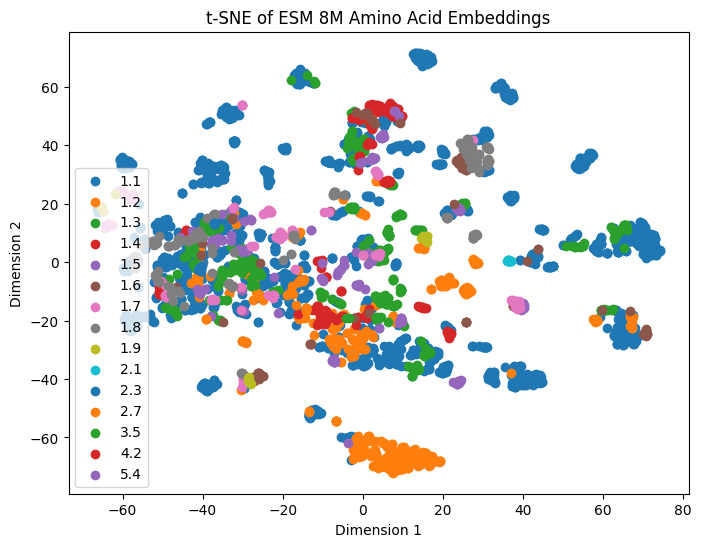

In [4]:
# Plot the t-SNE visualization with color-coded categorical labels
plt.figure(figsize=(8, 6))
for category in np.unique(labels):
    category_indices = (labels == category)
    plt.scatter(embedded_data[category_indices, 0], embedded_data[category_indices, 1], label=category)

plt.title('t-SNE of ESM 8M Amino Acid Embeddings')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(embeddings, labels, test_size=0.2, random_state=42)

# Fit a logistic regression classifier
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7450424929178471


/homes/abrace/.conda/envs/esm/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
from collections import Counter
Counter(labels)

Counter({'1.9': 24,
         '1.7': 144,
         '1.1': 1884,
         '1.6': 96,
         '1.2': 456,
         '1.8': 168,
         '1.3': 360,
         '2.1': 12,
         '1.4': 156,
         '1.5': 156,
         '2.7': 12,
         '3.5': 24,
         '5.4': 12,
         '4.2': 12,
         '2.3': 12})

In [2]:
from transformers import EsmTokenizer
tokenizer = EsmTokenizer.from_pretrained("../../tokenizer_esm_genslm")

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [4]:
tokenizer.get_vocab()

{'<cls>': 0,
 '<pad>': 1,
 '<eos>': 2,
 '<unk>': 3,
 'L': 4,
 'A': 5,
 'G': 6,
 'V': 7,
 'S': 8,
 'E': 9,
 'R': 10,
 'T': 11,
 'I': 12,
 'D': 13,
 'P': 14,
 'K': 15,
 'Q': 16,
 'N': 17,
 'F': 18,
 'Y': 19,
 'M': 20,
 'H': 21,
 'W': 22,
 'C': 23,
 'X': 24,
 'B': 25,
 'U': 26,
 'Z': 27,
 'O': 28,
 '.': 29,
 '-': 30,
 '<null_1>': 31,
 '<mask>': 32,
 'GGC': 33,
 'GCC': 34,
 'ATC': 35,
 'GAC': 36,
 'GAA': 37,
 'ATG': 38,
 'GTG': 39,
 'CTG': 40,
 'GTC': 41,
 'GCG': 42,
 'GAT': 43,
 'AAA': 44,
 'GGT': 45,
 'AAG': 46,
 'GAG': 47,
 'ACC': 48,
 'AAC': 49,
 'GTT': 50,
 'ATT': 51,
 'GCA': 52,
 'CTC': 53,
 'CGC': 54,
 'GCT': 55,
 'CAG': 56,
 'CCG': 57,
 'TTC': 58,
 'GTA': 59,
 'TCG': 60,
 'GGA': 61,
 'AAT': 62,
 'TAC': 63,
 'CTT': 64,
 'TTG': 65,
 'ACG': 66,
 'TCC': 67,
 'GGG': 68,
 'AGC': 69,
 'CCC': 70,
 'ACA': 71,
 'ACT': 72,
 'TCT': 73,
 'TTA': 74,
 'CGT': 75,
 'TAT': 76,
 'CAA': 77,
 'CGG': 78,
 'TTT': 79,
 'CAC': 80,
 'CCT': 81,
 'CCA': 82,
 'TGG': 83,
 'ATA': 84,
 'TCA': 85,
 'TGC': 86,
 'AG